In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#Dataset Creation
data = [
    ("A","Inception",5),
    ("A","Avatar",4),
    ("B","Inception",4),
    ("B","Titanic",5),
    ("C","Avatar",5),
    ("C","Titanic",4),
    ("D","Inception",1),
    ("D","Joker",5),
    ("E","Joker",4),
    ("E","Titanic",1),
]

In [3]:
df = pd.DataFrame(data,columns=["Person","Movie","Rating"])
print(df)

  Person      Movie  Rating
0      A  Inception       5
1      A     Avatar       4
2      B  Inception       4
3      B    Titanic       5
4      C     Avatar       5
5      C    Titanic       4
6      D  Inception       1
7      D      Joker       5
8      E      Joker       4
9      E    Titanic       1


In [4]:
B = nx.Graph()

#Create bipartite graph
for person,movie,rating in data:
  B.add_node(person,bipartite=0)
  B.add_node(movie,bipartite=1)
  B.add_edge(person,movie,weight=rating)

(np.float64(-0.10500000000000001),
 np.float64(1.105),
 np.float64(-0.42000000000000004),
 np.float64(4.42))

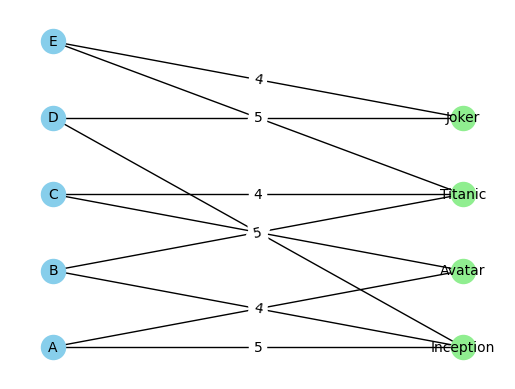

In [5]:
#separate the sets based on bipartite attribute
people_nodes=[n for n,d in B.nodes(data=True) if d['bipartite']==0]
movie_nodes=[n for n,d in B.nodes(data=True)if d['bipartite']==1]

#layout for bipartite
pos= dict()
pos.update((node,(0,i))for i,node in enumerate(people_nodes))
pos.update((node,(1,i))for i,node in enumerate(movie_nodes))

#Draw nodes
nx.draw_networkx_nodes(B,pos,nodelist=people_nodes,node_color='skyblue',label='people')
nx.draw_networkx_nodes(B,pos,nodelist=movie_nodes,node_color='lightgreen',label='movie')

#draw edges with labels
nx.draw_networkx_edges(B,pos)
edgelabels = nx.get_edge_attributes(B,'weight')
nx.draw_networkx_edge_labels(B,pos,edge_labels=edgelabels)

#node labels
nx.draw_networkx_labels(B,pos,font_size=10)

plt.axis('off')



In [6]:
person= sorted(set(df["Person"]))
movie= sorted(set(df["Movie"]))
rating_matrix=pd.DataFrame(0,index=person,columns=movie)

In [7]:
for _,row in df.iterrows():
  rating_matrix.loc[row["Person"],row["Movie"]]=row["Rating"]

In [8]:
#kmeans
Kmeans= KMeans(n_clusters=2,random_state=42)
clusters=Kmeans.fit_predict(rating_matrix)
cluster_map=dict(zip(person,clusters))
print(cluster_map)

{'A': np.int32(0), 'B': np.int32(0), 'C': np.int32(0), 'D': np.int32(1), 'E': np.int32(1)}


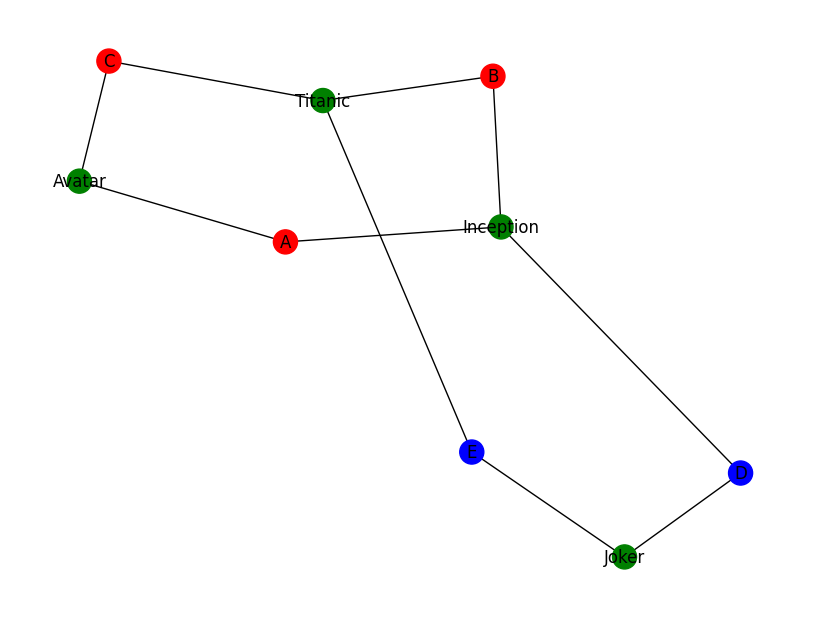

In [9]:
#visualization
pos=nx.spring_layout(B,seed=42)
node_colors=[]

for node in B.nodes():
  if node in cluster_map:
    node_colors.append("red" if cluster_map[node]==0 else "blue")
  else:
    node_colors.append("green")

plt.figure(figsize=(8,6))
nx.draw(B,pos,with_labels=True,node_color=node_colors)